In [118]:
# import built-in packages
from warnings import filterwarnings
import re

# import third-party packages
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.io as pio
import pandas as pd
import seaborn as sns
import scipy as sp
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from wordcloud import WordCloud, STOPWORDS

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

pio.renderers.default = "iframe"

[nltk_data] Downloading package punkt to /home/dshah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dshah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dshah/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/dshah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/dshah/nltk_data...


In [3]:
# filter out warnings to avoid unneccessary outputs
filterwarnings(
    'ignore'
)

In [4]:
# set custom pandas options
for option, value in {
    'display.max_columns': 50,
    'display.max_colwidth': None,
    'display.max_info_columns': 50,
    'display.max_rows': 20,
    'display.precision': 4,
    # 'plotting.backend': 'plotly'
}.items():
    pd.set_option(
        option,
        value        
    )

In [33]:
# load each dataset into a pandas DataFrame object
cocoon_pharmacy_df = pd.read_csv(
    '../data/cocoon_center_pharmacy.csv'
)
data_literacy_df = pd.read_csv(
    '../data/data_literacy_questionnaire.csv'
)
data_journey_df = pd.read_csv(
    '../data/data_journey_questionnaire.csv'
)
meeting_cadence_df = pd.read_csv(
    '../data/meeting_cadence_survey.csv'
)

In [6]:
# create an example function with one mandatory and one optional parameter
def display_with_info(
    dataframe: pd.DataFrame,
    name: str = None
) -> None:
    # print dataframe name if passed
    if name:
        print(
            '=' * len(name),
            end = '\n'
        )
        print(
            name,
            end = '\n' + (
                '=' * len(name)
            ) + '\n\n'
        )
    # display dataframe information
    display(
        dataframe.info()
    )
    # label the next output
    print(
        # create the illusion of a border by using hyphens
        '-' * 14
    )
    print(
        'First Ten Rows',
        # create the illusion of a border by using hyphens
        end = '\n' + (
            '-' * 14
        )
    )
    # display the first ten rows of the dataframe
    display(
        dataframe.head(
            10
        )
    )
    # label the next output
    print(
        # create the illusion of a border by using hyphens
        '\n',
        end = (
            '-' * 13
        ) + '\n'
    )
    print(
        'Last Ten Rows',
        # create the illusion of a border by using hyphens
        end = '\n' + (
            '-' * 13
        )
    )
    # display the last ten rows of the dataframe
    display(
        dataframe.tail(
            10
        )
    )

In [7]:
# create dictionary of dataframes and their names
sample_datasets = {
    'Cocoon Center Pharmacy Items & Reviews': cocoon_pharmacy_df,
}
# 'Data Literacy Questionnaire': data_literacy_df,
# 'Data Journey Questionnaire': data_journey_df,
# 'Meeting Cadence Survey': meeting_cadence_df
# iterate through (dataframe name - dataframe object) 'key - value' pairs 
for df_name, df_object in sample_datasets.items():
    # display each dataframe's summary information and first/last 10 rows
    display_with_info(
        df_object,
        df_name
    )
    # add a horizontal border to separate outputs
    print(
        '\n' + (
            '_' * 79
        ),
        end = '\n\n'
    )

Cocoon Center Pharmacy Items & Reviews

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EAN_code           1539 non-null   int64  
 1   product_cat        1539 non-null   object 
 2   brand              1539 non-null   object 
 3   form               1539 non-null   object 
 4   volume             1539 non-null   object 
 5   price              1539 non-null   float64
 6   description        1539 non-null   object 
 7   num_review         1539 non-null   int64  
 8   overall_rate       1539 non-null   float64
 9   overall_prod_qual  1539 non-null   object 
 10  customer_id        1539 non-null   object 
 11  age_group          1539 non-null   object 
 12  gender             1539 non-null   object 
 13  customer_loc       1539 non-null   object 
 14  cus_rev_num        1539 non-null   int64  
 15  review_vote        1539 non-null

None

--------------
First Ten Rows
--------------

EAN_code        product_cat     brand   form volume  price  \
0  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
1  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
2  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
3  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
4  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
5  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
6  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
7  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
8  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
9  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   

                                         description  num_review  \
0  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
1  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
2  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
3  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
4  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
5  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
6  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
7  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
8  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
9  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   

   overall_rate overall_prod_qual   customer_id age_group  gender  \
0           4.8               4.9   ALDHAFEERI      35-44    male   
1           4.8               4.9         Rana      25-34  female   
2           4.8               4.9         Evoo      25-34  female   
3           4.8               4.9         Uvva      35-44  female   
4           4.8               4.9     Marie PC      45-54  female   
5           4.8               4.9     Hidaweya      35-44  female   
6           4.8               4.9     Bulanina      35-44  female   
7           4.8               4.9     Abdullah      25-34    male   
8           4.8               4.9         Rosa      45-54  female   
9           4.8               4.9     Elowiisa      25-34  female   

       customer_loc  cus_rev_num  review_vote  customer_rate product_qual  \
0    SAUDI ARABIA              4            0              5            5   
1     not available            2            0              5            5   
2    Saudi Arabia              4            0              5            5   
3    Riga, Latvia              2            0              5            5   
4              UK              4            0              5            5   
5         Bahrain              9            5              5            5   
6        Kingston              1            1              5            5   
7            Oman              1            1              5            5   
8       Newcastle              1            1              5            5   
9          London              1            1              5            5   

       recommend                head_review  \
0            yes                      great   
1            yes                       love   
2            yes           perfect moisture   
3            yes            best experience   
4            yes  best moisturiser dry skin   
5            yes                 best cream   
6            yes                       miss   
7            yes                         mr   
8            yes               good product   
9  not available               life changer   

                                                                                                                                          body_review  \
0                                                                                                                        great item fast shipping buy   
1                                                       


-------------
Last Ten Rows
-------------

EAN_code                                            product_cat  \
1529  3367729117264                                      Body Moisturisers   
1530  3662361000753                                 Body Soothing Products   
1531  3401360226937    Baby and Mom  Mother / Future Mother  Stretch-Marks   
1532  3282770111583                                      Body Moisturisers   
1533  3401360226975                                           Body Massage   
1534  3264680015946                                          Body Dry Oils   
1535  3264680015946                                          Body Dry Oils   
1536  3540550008141                                            Body Scrubs   
1537  3540550008141                                            Body Scrubs   
1538  3577056020742                                      Body Moisturisers   

                      brand   form         volume  price  \
1529               Biotherm   Milk            400  19.99   
1530                    SVR   Balm            400  24.50   
1531                 Weleda    Oil            100  13.60   
1532                  Avène   Balm            250  15.99   
1533                 Weleda    Oil            100  12.30   
1534                   Nuxe    Oil            100  19.80   
1535                   Nuxe    Oil            100  19.80   
1536                Filorga  Cream            150  15.40   
1537                Filorga  Cream            150  15.40   
1538  PierreFabreHealthCare  Cream  not available  10.90   

                                                        description  \
1529             Biotherm Lait Corporel Anti-Drying Body Milk 400ml   
1530                         SVR Topialyse Intensive Balm 2 x 400ml   
1531               Weleda Maternity Stretch-Marks Massage Oil 100ml   
1532                     Avène Body Moisturizing Melt-in Balm 250ml   
1533              Weleda Lavender Relaxing Body Oil with Pump 100ml   
1534                           Nuxe Huile Prodigieuse Florale 100ml   
1535                           Nuxe Huile Prodigieuse Florale 100ml   
1536                              Filorga Scrub and Peel Body 150ml   
1537                              Filorga Scrub and Peel Body 150ml   
1538  Pierre Fabre Health Care Dexeryl Cutaneous Dryness Cream 500g   

      num_review  overall_rate overall_prod_qual   customer_id      age_group  \
1529          13           5.0     not available   Alainis O.   not available   
1530           1           5.0               5.0        M S Z           25-34   
1531           1           5.0               5.0        Mirah           25-34   
1532           1           5.0               5.0       Anne44        65orover   
1533           1           5.0               5.0         Jana           35-44   
1534           2           5.0               5.0     Chris269           45-54   
1535           2           5.0               5.0      RandaMB   not available   
1536           2           4.5               5.0         meme           35-44   
1537           2           4.5               5.0         Rfam           55-64   
1538           1           4.0               5.0    Monica M.           18-24   

             gender      customer_loc  cus_rev_num  review_vote  \
1529  not available     not available            4            0   
1530           male     not available            3            9   
1531         female       Abu dhabi              4            3   
1532         female    Welsh border              3            0   
1533         female        Brighton              5            3   
1534         female       Stockport              2            0   
1535  not available    Saudi Arabia              3            5   
1536         female          Kuwait              2            1   
1537         female     not available            3            1   
1538         female     not available            3            1   

      customer_rate   product_qual      recommend        head_review  \
1529   


_______________________________________________________________________________



In [8]:
# iterate through sample datasets again but display profile report this time
for df_name, df_object in sample_datasets.items():
    display(
        ProfileReport(
            df_object,
            title = f'Profile of {df_name} DataFrame',
            html = {
                'navbar_show': True,
                'style': {
                    'primary_color': '#016ba9',
                    'full_width': True
                }
            },
            progress_bar = False
        ).to_notebook_iframe()
    )

None

#### ANALYZING CUSTOMER LOCATIONS

In [78]:
# !pip install geopy

In [82]:
# from geopy.geocoders import Nominatim
# cocoon_pharmacy_df['customer_loc'] = cocoon_pharmacy_df['customer_loc'].str.strip().str.lower()
# cocoon_pharmacy_df['customer_loc'] = cocoon_pharmacy_df['customer_loc'].replace({'the kingdom':'saudi arabia',
#                                                                                 'good':None,
#                                                                                 'not available':None,
#                                                                                 'ksa':'saudi arabia',
#                                                                                 'the kingdom':'saudi arabia',
#                                                                                 'london o':'london, ontario',
#                                                                                 'cheshire':'cheshire, uk',
#                                                                                 '-':None,
#                                                                                 'sale, cheshire':'sale, cheshire, uk',
#                                                                                 'tilbury, essex':'tilbury, essex, uk',
#                                                                                 'middle east':'ksa middle east',
#                                                                                 'kingston':'kingston, uk',
#                                                                                 'awali':'awali, bahrain',
#                                                                                 'riyadh, s. a.':'riyadh, saudi arabia',
#                                                                                 'north':None,
#                                                                                 'south east':None,
#                                                                                 'memo':None})
# geolocator = Nominatim(user_agent="s")
# # location = geolocator.geocode("Welsh Border")
# # geolocator.geocode("Abu Dhabi")

# cocoon_pharmacy_df['Customer_Location_Latitude_Longitude'] = cocoon_pharmacy_df['customer_loc'].apply(lambda x: geolocator.geocode(x) if pd.notnull(geolocator.geocode(x)) else None)
# cocoon_pharmacy_df['Latitude'] = cocoon_pharmacy_df['Customer_Location_Latitude_Longitude'].apply(lambda x: x.latitude if pd.notnull(x) else None) 
# cocoon_pharmacy_df['Longitude'] = cocoon_pharmacy_df['Customer_Location_Latitude_Longitude'].apply(lambda x: x.longitude if pd.notnull(x) else None) 


In [9]:
cocoon_pharmacy_df.head()

EAN_code        product_cat     brand   form volume  price  \
0  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
1  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
2  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
3  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   
4  3401326306048  Body Moisturisers  Bioderma  Cream    500   19.9   

                                         description  num_review  \
0  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
1  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
2  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
3  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   
4  Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml         507   

   overall_rate overall_prod_qual   customer_id age_group  gender  \
0           4.8               4.9   ALDHAFEERI      35-44    male   
1           4.8               4.9         Rana      25-34  female   
2           4.8               4.9         Evoo      25-34  female   
3           4.8               4.9         Uvva      35-44  female   
4           4.8               4.9     Marie PC      45-54  female   

       customer_loc  cus_rev_num  review_vote  customer_rate product_qual  \
0    SAUDI ARABIA              4            0              5            5   
1     not available            2            0              5            5   
2    Saudi Arabia              4            0              5            5   
3    Riga, Latvia              2            0              5            5   
4              UK              4            0              5            5   

  recommend                head_review  \
0       yes                      great   
1       yes                       love   
2       yes           perfect moisture   
3       yes            best experience   
4       yes  best moisturiser dry skin   

                                                                                                                                          body_review  \
0                                                                                                                        great item fast shipping buy   
1                                                                                                     bought month like productand second time bought   
2                                                                                                            bought sister perfect moisture ever used   
3                                                                             family happy wonderful product winter season skin vwry dry product help   
4  used product many year never failed family highly nourishing amazing dry sensitive skin thank continue use foreseeable would 100 recommend product   

   review_date  
0  4 hours ago  
1   2 days ago  
2  11 days ago  
3  23 days ago  
4  a month ago

In [85]:
# cocoon_pharmacy_df.to_csv('cocoon_pharmacy_location_added.csv')

brand   customer_id       EAN_code      recommend  \
0                  Bioderma   ALDHAFEERI   3401326306048            yes   
1                  Bioderma         Rana   3401326306048            yes   
2                  Bioderma         Evoo   3401326306048            yes   
3                  Bioderma         Uvva   3401326306048            yes   
4                  Bioderma     Marie PC   3401326306048            yes   
...                     ...           ...            ...            ...   
1534                   Nuxe     Chris269   3264680015946            yes   
1535                   Nuxe      RandaMB   3264680015946  not available   
1536                Filorga         meme   3540550008141            yes   
1537                Filorga         Rfam   3540550008141  not available   
1538  PierreFabreHealthCare    Monica M.   3577056020742            yes   

      cus_rev_num  \
0               4   
1               2   
2               4   
3               2   
4               4   
...           ...   
1534            2   
1535            3   
1536            2   
1537            3   
1538            3   

                                                        description  \
0                 Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml   
1                 Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml   
2                 Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml   
3                 Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml   
4                 Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml   
...                                                             ...   
1534                           Nuxe Huile Prodigieuse Florale 100ml   
1535                           Nuxe Huile Prodigieuse Florale 100ml   
1536                              Filorga Scrub and Peel Body 150ml   
1537                              Filorga Scrub and Peel Body 150ml   
1538  Pierre Fabre Health Care Dexeryl Cutaneous Dryness Cream 500g   

      customer_loc  num_review product_qual  overall_rate overall_prod_qual  \
0     saudi arabia         507            5           4.8               4.9   
1              NaN         507            5           4.8               4.9   
2     saudi arabia         507            5           4.8               4.9   
3     riga, latvia         507            5           4.8               4.9   
4               uk         507            5           4.8               4.9   
...            ...         ...          ...           ...               ...   
1534     stockport           2            5           5.0               5.0   
1535  saudi arabia           2            5           5.0               5.0   
1536        kuwait           2            5           4.5               5.0   
1537           NaN           2            5           4.5               5.0   
1538           NaN           1            5           4.0               5.0   

       form                head_review         volume  customer_rate  \
0     Cream                      great            500              5   
1     Cream                       love            500              5   
2     Cream           perfect moisture            500              5   
3     Cream            best experience            500              5   
4     Cream  best moisturiser dry skin            500              5   
...     ...                        ...            ...            ...   
1534    Oil           lovely fragrance            100              5   
1535    Oil              not available            100              5   
1536  Cream                      great            150              5   
1537  Cream                      great            150              4   
1538  Cream                    amazing  not available              4   

      review_vote        product_cat      age_group  Unnamed: 0  price  \
0               0  Body Moisturisers          35-44           0   19.9   
1               0  Body Moisturisers          25-34  

In [128]:
cocoon_pharmacy_df = pd.read_csv('cocoon_pharmacy_location_added.csv',index_col = 0)
columns_without_customer_location = set(cocoon_pharmacy_df.columns).difference(['Customer_Location_Latitude_Longitude','Latitude','Longitude'])
cocoon_pharmacy_df = cocoon_pharmacy_df.loc[cocoon_pharmacy_df[columns_without_customer_location].drop_duplicates(keep  = 'first').index,:]

In [129]:
pio.renderers.default = "iframe"
fig = px.scatter_geo(cocoon_pharmacy_df, lat='Latitude',lon='Longitude', hover_name = 'customer_loc')
fig.update_geos(
    resolution=50,
    showland=True, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue"
)

fig.update_layout(
    margin=dict(l=5, r=5, t=25, b=5),
    paper_bgcolor="lightGrey",
)
fig.update_traces(marker=dict(size=9, color = 'yellow', opacity = 0.6))
fig.update_layout(title = 'Customer Locations, Cocoon Pharmacy')
fig.show()

#### OVERALL PRICE VARIATION PER BRAND AND PRODUCT CATEGORY COMBINATION

In [130]:
brand_product_prices = cocoon_pharmacy_df[['brand','product_cat','form','volume','price']].drop_duplicates()
brand_product_prices['volume'] = brand_product_prices['volume'].replace({'not available':None})
brand_product_prices['price_per_ml'] = brand_product_prices['price'].div(brand_product_prices['volume'].astype('float'))
%matplotlib inline

fig = px.box(brand_product_prices, x = 'brand', y = 'price_per_ml', color= 'product_cat', points = 'all')
fig.update_xaxes(tickangle=325, title = 'Brand')
fig.update_yaxes(title = 'Price per ml')
fig.update_layout(title = 'PRICE VARIATION PER BRAND AND PRODUCT CATEGORY')
fig.update_layout(title = dict(
        text='<b>Price variation per product and brand</b>',
        font=dict(
            size=24
        )))
# ax.set_xticklabels(labels = ax.get_xticklabels(),rotation = 45, fontsize = 18)
fig.show()


#### NUMBER OF REVIEWS PER BRAND

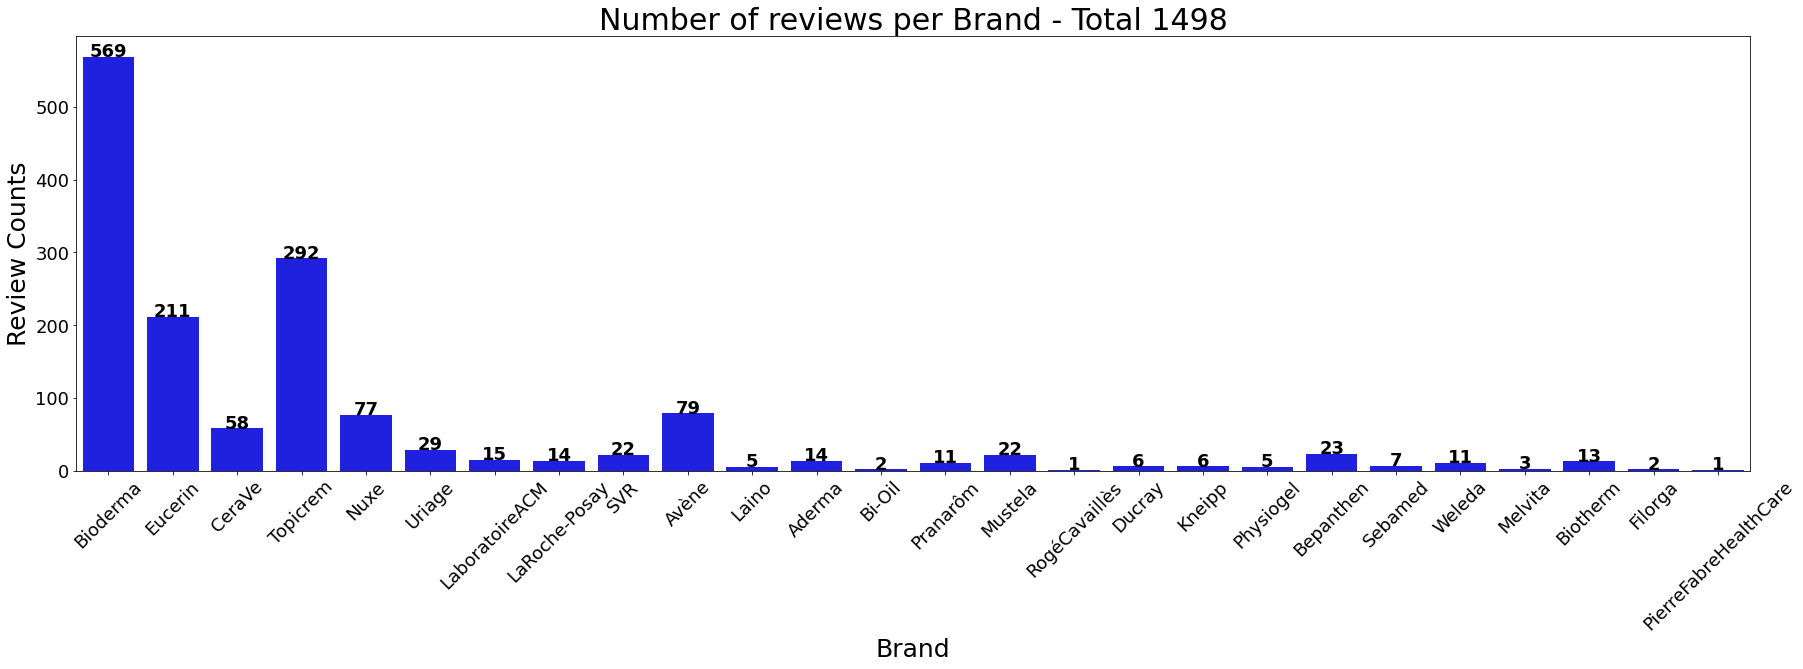

In [131]:
plt.figure(figsize = (30,8))
ax = sns.countplot(data = cocoon_pharmacy_df, x = 'brand', color = 'blue')
for p in ax.patches:
    x = p.get_x()
    height = p.get_height()
    width = p.get_width()
    if pd.isnull(height):
        pass
    else:   
        ax.text(x+width/2, height, str(height) , ha = 'center', weight = 'bold', fontsize = 18)

plt.xticks(rotation = 45, fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Brand', fontsize = 25)
plt.ylabel('Review Counts', fontsize = 25)
plt.title('Number of reviews per Brand - Total {}'.format(cocoon_pharmacy_df.shape[0]),size = 30)
plt.show()

#### NUMBER OF REVIEWS PER PRODUCT CATEGORY

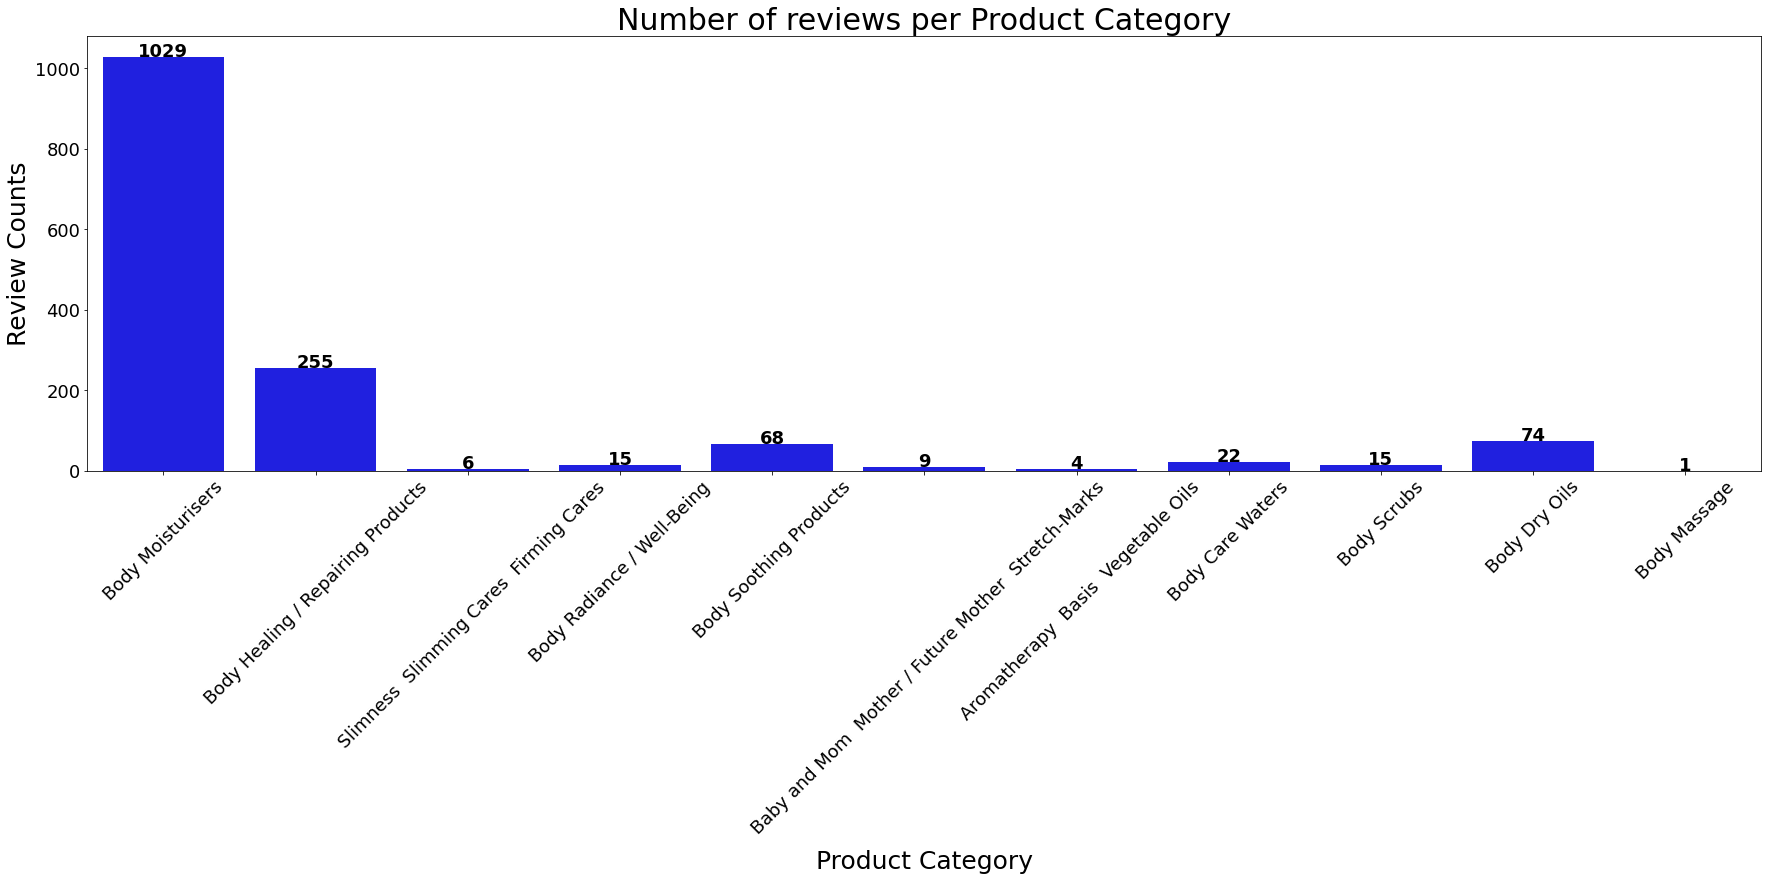

In [132]:
plt.figure(figsize = (30,8))
ax = sns.countplot(data = cocoon_pharmacy_df, x = 'product_cat', color = 'blue')
for p in ax.patches: 
    x = p.get_x()
    height = p.get_height()
    width = p.get_width()
    if pd.isnull(height):
        pass
    else:   
        ax.text(x+width/2, height, str(height) , ha = 'center', weight = 'bold', fontsize = 18)

plt.xticks(rotation = 45, fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Product Category', fontsize = 25)
plt.ylabel('Review Counts', fontsize = 25)
plt.title('Number of reviews per Product Category', fontsize = 30)
plt.show()

#### NUMBER OF REVIEWS PER BRAND AND PRODUCT CATEGORY

In [133]:

cnt_df = cocoon_pharmacy_df.groupby(['product_cat','brand'])['form'].count().reset_index().rename({'form':'Review Count'},axis = 1).reset_index()
fig = px.bar(cnt_df, x = 'product_cat', y = 'Review Count', color= 'brand', color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_xaxes(tickangle=325, title = 'Brand')
fig.update_yaxes(title = 'Review Counts')
fig.update_layout(title = dict(
        text='<b>Number of reviews per Product Category and Brand</b>',
        font=dict(
            size=24
        )),  xaxis={'categoryorder':'total descending'})
# ax.set_xticklabels(labels = ax.get_

#### TEXT ANALYSIS

In [136]:
# cocoon_pharmacy_df['body_review'].isnull().sum()
cocoon_pharmacy_df['body_review'] = cocoon_pharmacy_df['body_review'].str.lower()
cocoon_pharmacy_df['body_review'] = cocoon_pharmacy_df['body_review'].apply(lambda x:  re.sub(r'[^\w\s]','',x))

def makewordcloud(df):
    words = ' '.join(df['body_review'])
    tokens = word_tokenize(words)
    english_stops = set(stopwords.words('english'))
    words_fin = " ".join([w for w in tokens if len(w) > 2 and w not in english_stops and w and w.isalpha()])
    lemmatizer = WordNetLemmatizer()
    word_pos = pos_tag(word_tokenize(words_fin))
    string_l = ''
    for i in range (0, len(word_pos)):
        if "V" in word_pos[i][1][0]:
            pos = 'v'
        else:
            pos = 'n'
        lem = lemmatizer.lemmatize(word_pos[i][0], pos)
        string_l += (lem) + ' '
        
    wordcloud = WordCloud(stopwords=STOPWORDS, prefer_horizontal=0.9, max_words = 100).generate(string_l)
 
    return wordcloud

Body Moisturisers
Body Healing / Repairing Products
Body Dry Oils
Body Soothing Products


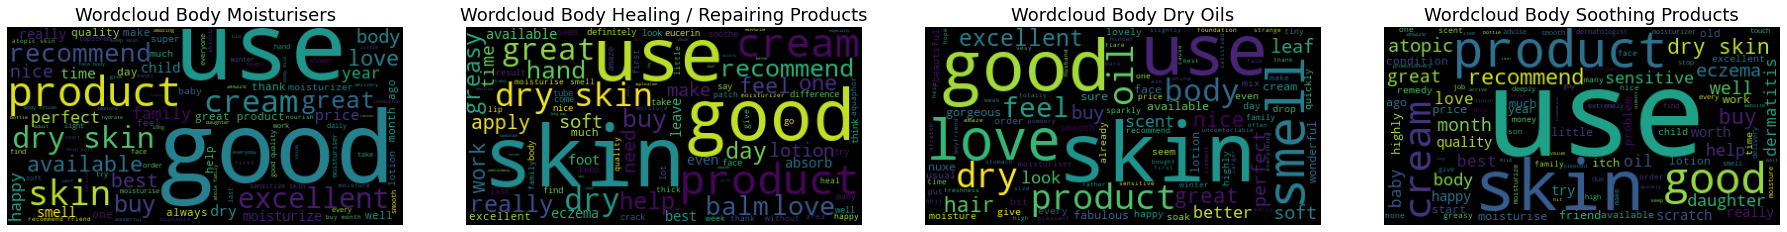

In [137]:
col = 0
fig,ax = plt.subplots(nrows = 1, ncols = 4, figsize = (25,10))
for product_cat in cocoon_pharmacy_df['product_cat'].value_counts().sort_values(ascending = False)[:4].index:
    print(product_cat)
    ax[col].imshow(makewordcloud(cocoon_pharmacy_df[cocoon_pharmacy_df['product_cat'] == product_cat]))
    ax[col].axis("off")
    ax[col].set_title('Wordcloud ' + product_cat,fontsize = 18)
    col+=1
fig.tight_layout()
plt.show()